In [3]:
import matplotlib.pyplot as plt
from collections import Counter
import json
import numpy as np

In [6]:
file_path = 'D://AppMetricaData//data.json'


In [7]:
class dict_event:
  def __init__(self,name,value):
    self.name=name
    self.value=value

In [8]:
class Event:
    def __init__(self, os_name, os_version, device_model, device_type, app_version_name, event_name, dict_event, event_datetime):
        self.os_name=os_name
        self.os_version=os_version
        self.device_model=device_model
        self.device_type=device_type
        self.app_version_name=app_version_name
        self.event_name=event_name
        self.dict_event=dict_event
        self.event_datetime=event_datetime

In [9]:
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines
text_array = load_text_file(file_path)

In [10]:
events=[]
text_array=text_array[3:-2]
for j in range(len(text_array)):
    text_metric=text_array[j][1:-3].split(',')
    metric=[i.strip('"').split('":"') for i in text_metric]
    if len(metric)==8:
        metric[6][1]=metric[6][1].replace("{", "").replace("}", "").replace("\\", "").replace('"', "").split(':')
        events.append(Event(metric[0][1], metric[1][1], metric[2][1], metric[3][1], metric[4][1], metric[5][1], metric[6][1][1], metric[7][1]))

In [11]:
def render_type(type_graph,value_type,event,message, threshold):
  if type_graph == "r":
    plot_radio(event,value_type,message, threshold)
  elif type_graph == "c":
    plot_column(event,value_type,message, threshold)
  elif type_graph == "l":
    plot_liner(event,value_type,message, threshold)
  else:
    print("!error unknown literal")

In [12]:
def render_type_multi(type_graph,value_type,event,message, threshold,message_legend):
  if type_graph == "r":
    print("!error it is impossible to overlay radial graphs")
  elif type_graph == "c":
    plot_bar_multi(event,value_type,message,threshold,message_legend)
  elif type_graph == "l":
    plot_liner_multi(event,value_type,message,threshold,message_legend)
  else:
    print("!error unknown literal")

In [13]:
def render(events,type_graph,value_type,field_name,threshold,filter_name=None,filter_value=None,matched=False,combine=False):
  if filter_name==None:
    event=[]
    for i in events:
        event.append(getattr(i,field_name, None))
    render_type(type_graph,value_type,event,""+field_name, threshold)
  else:
    if len(filter_value)==1:
      event=[]
      for i in events:
          if not matched:
            if getattr(i,filter_name, None)!=filter_value[0]:
                event.append(getattr(i,field_name, None))
          else:
            if getattr(i,filter_name, None)==filter_value[0]:
                event.append(getattr(i,field_name, None))
      if matched==False:
        massege_rander=field_name+": not "+filter_name+str(filter_value)
      else:
        massege_rander=field_name+": "+filter_name+str(filter_value)

      render_type(type_graph,value_type,event,massege_rander, threshold)
    else:
      event_list=[]
      for j in range(len(filter_value)):
        event=[]
        
        for i in events:
          if not matched:
            if getattr(i,filter_name, None)!=filter_value[j]:
                event.append(getattr(i,field_name, None))
          else:
            if getattr(i,filter_name, None)==filter_value[j]:
                event.append(getattr(i,field_name, None))
        event_list.append(event)

      if matched==False:
        message_legend=["not "+filter_name+": "+str(i) for i in filter_value]
      else:
        message_legend=[filter_name+": "+str(i) for i in filter_value]

      render_type_multi(type_graph,value_type,event_list,""+field_name,threshold,message_legend)

In [14]:
def conversion(events,value_type,field_name,metica,metica_val):
  event=[]
  for i in events:
      if getattr(i,metica, None)==metica_val:
        event.append(getattr(i,field_name, None))
  plot_column_converson(event,value_type,""+metica_val)

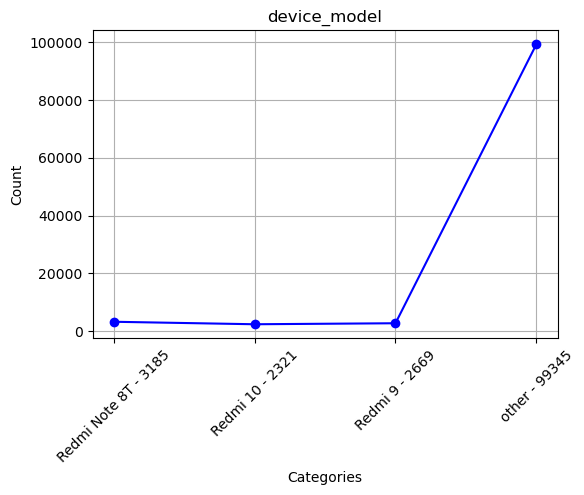

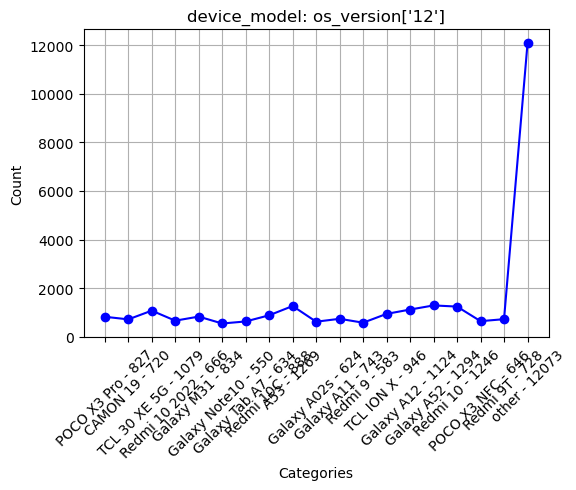

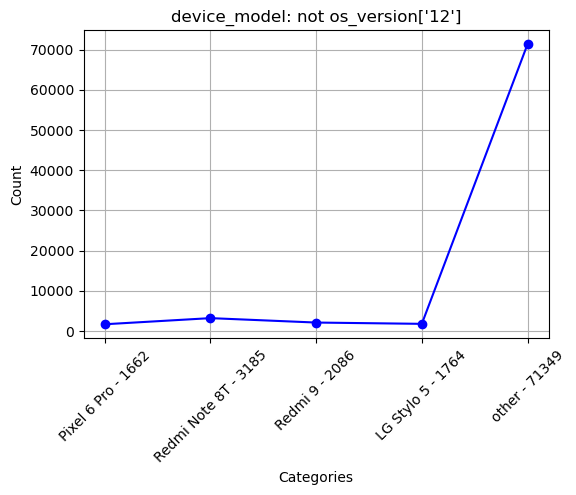

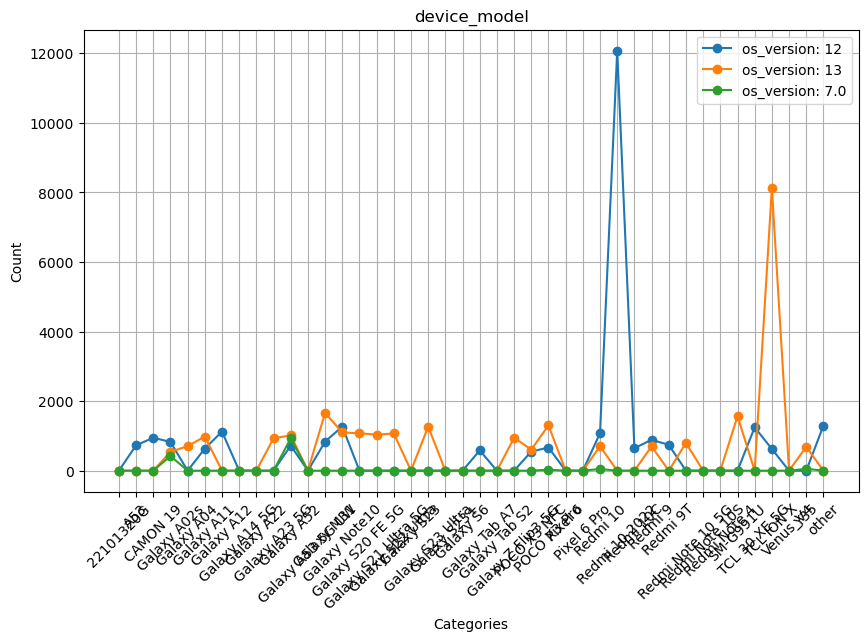

In [ ]:
# r-радиальный \ с-столбцы \ l - линия
# n-число \ %- проценты

# без фильров =                render(events,"c","%","device_model",2)
# фильтр на соответствие =     render(events,"c","%","device_model",2,"os_version",["12"],True)
# фильтр на не соответствие =  render(events,"c","%","device_model",2,"os_version",["12"],False)
# фильтр на соответствие =     render(events,"с","n","device_model",2,"os_version",["12","13","7.0"], True)
# фильтр на не соответствие =  render(events,"с","n","device_model",2,"os_version",["12","13","7.0"], False)

render(events,"l","n","device_model",2)
render(events,"l","n","device_model",2,"os_version",["12"],True)
render(events,"l","n","device_model",2,"os_version",["12"],False)
render(events,"l","n","device_model",2,"os_version",["12","13","7.0"], True)
render(events,"l","n","device_model",2,"os_version",["12","13","7.0"], False)

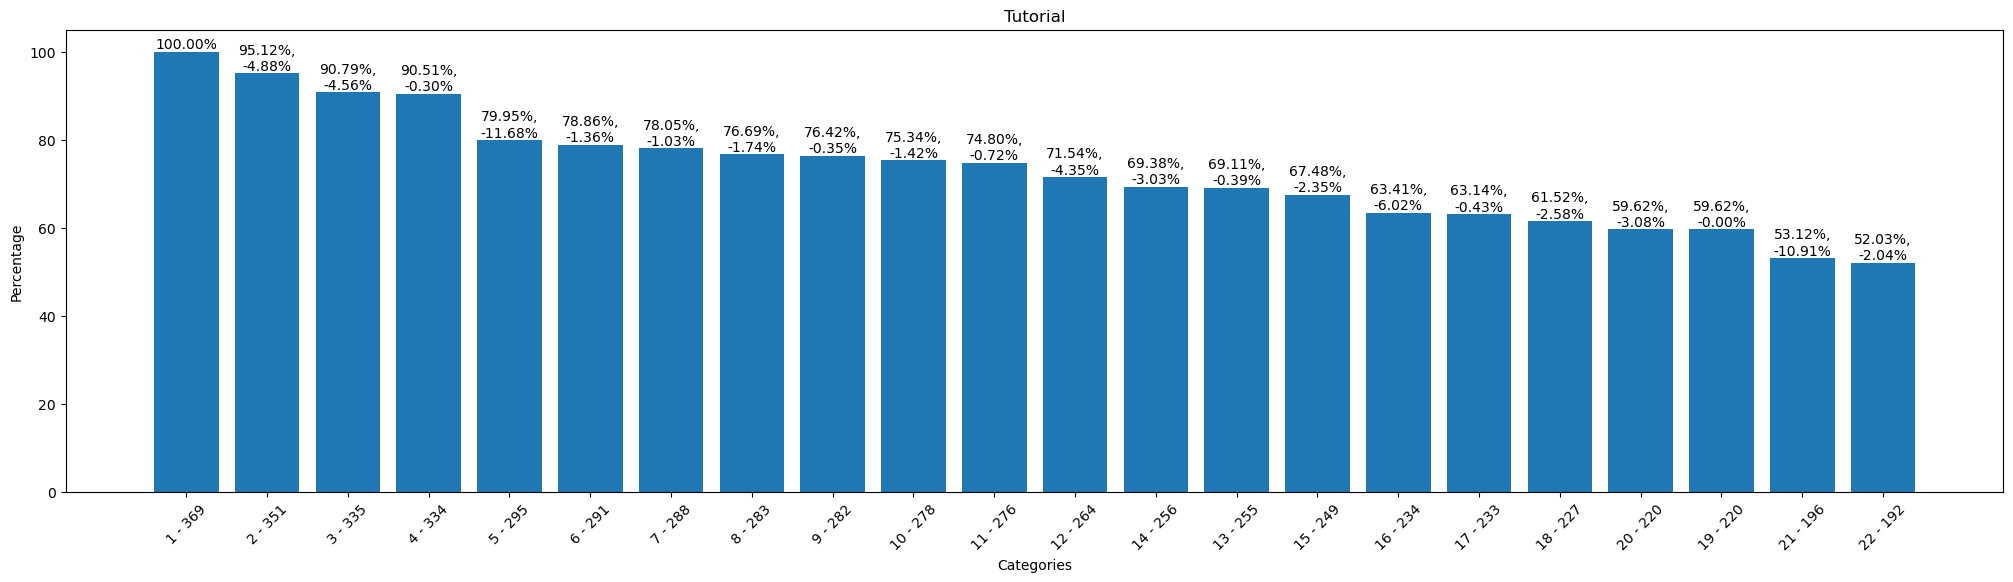

In [24]:
conversion(events,'%',"dict_event","event_name","Tutorial")

In [17]:
def plot_column_converson(event, value_type, message,):
    # Подсчитываем количество каждого элемента в массиве event
    event_counts = {item: event.count(item) for item in set(event)}
    total_count = sum(event_counts.values())

    # Получаем данные в процентах
    data_labels = [item for item in event_counts.keys()]
    data_count = [count for count in event_counts.values()]
    data_procen = [count / total_count * 100 for count in event_counts.values()]

    # Объединяем значения, которые составляют менее threshold процентов, в категорию "other"
    other_percentage = 0.0
    other_count = 0
    new_data_count = []
    new_data_labels = []
    new_data_procen = []
    for label, count, procen in zip(data_labels, data_count, data_procen):
      new_data_count.append(count)
      new_data_procen.append(procen)
      new_data_labels.append(label)   

    if value_type == "%":
        data_value = new_data_procen
        data_labels = [f"{item} - {value}" for item, value in zip(new_data_labels, new_data_count)]
        ylabel = "Percentage"
    elif value_type == "n":
        data_value = new_data_count
        data_labels = [f"{item} - {value}" for item, value in zip(new_data_labels, new_data_count)]
        ylabel = "Count"
        event_counts["other"] = other_count
    else:
        raise ValueError("Invalid value_type. Use either '%' or 'n'.")

   # Сортировка данных в порядке убывания
    sorted_data = sorted(zip(data_labels, data_value), key=lambda x: x[1], reverse=True)
    sorted_labels, sorted_values = zip(*sorted_data)

    # Получаем проценты относительно первой колонки
    first_value = sorted_values[0]
    relative_percentages = [value / first_value * 100 for value in sorted_values]

    # Создаем столбчатую диаграмму
    plt.figure(figsize=(25, 6))
    bars = plt.bar(sorted_labels, relative_percentages)  # Используем относительные проценты
    plt.xlabel("Categories")
    plt.ylabel(ylabel)
    plt.title(message)
    plt.xticks(rotation=45)

    # Добавляем проценты на лейблах, относительно первой колонки
    for i, (bar, label, value) in enumerate(zip(bars, sorted_labels, sorted_values)):
        relative_to_first_column = value / first_value * 100
        if i>0:
          relative_to_last_column=100-(value/sorted_values[i-1]*100)
        if value_type == "n":
            plt.annotate(f"{value}", (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='bottom')
        else:
          if i>0:
            plt.annotate(f"{relative_to_first_column:.2f}%,\n-{relative_to_last_column:.2f}%", (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='bottom')
          else:
            plt.annotate(f"{relative_to_first_column:.2f}%", (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='bottom')

        plt.xticks(range(len(sorted_labels)), sorted_labels)

    plt.show()

In [18]:
def plot_radio(event, value_type, message, threshold):
    # Подсчитываем количество каждого элемента в массиве event
    event_counts = {item: event.count(item) for item in set(event)}
    total_count = sum(event_counts.values())

     # Получаем данные в процентах
    data_labels = [item for item in event_counts.keys()]
    data_count = [count for count in event_counts.values()]
    data_procen = [count / total_count * 100 for count in event_counts.values()]

    # Объединяем значения, которые составляют менее threshold процентов, в категорию "other"
    other_percentage = 0.0
    other_count = 0
    new_data_count = []
    new_data_labels = []
    new_data_procen = []
    for label, count, procen in zip(data_labels, data_count, data_procen):
          if procen >= threshold:
              new_data_count.append(count)
              new_data_procen.append(procen)
              new_data_labels.append(label)
          else:
              other_percentage += procen
              other_count += count

    if other_percentage > 0:
        new_data_labels.append("other")
        new_data_procen.append(other_percentage)
        new_data_count.append(other_count)

    if value_type == "%":
        data_value=new_data_procen
        data_labels = [f"{item} - {value:.2f}%" for item, value in zip(new_data_labels, new_data_procen)]
        ylabel = "Percentage"
    elif value_type == "n":
        data_value=new_data_count
        data_labels = [f"{item} - {value}" for item, value in zip(new_data_labels, new_data_count)]
        ylabel = "Count"
        event_counts["other"] = other_count
    else:
        raise ValueError("Invalid value_type. Use either '%' or 'n'.")

    # Создаем круговую диаграмму
    plt.figure(figsize=(5, 5))
    plt.pie(data_value, labels=data_labels, autopct="%1.1f%%")
    plt.title(message)
    plt.show()


In [19]:
def plot_column(event, value_type, message, threshold):
    # Подсчитываем количество каждого элемента в массиве event
    event_counts = {item: event.count(item) for item in set(event)}
    total_count = sum(event_counts.values())

     # Получаем данные в процентах
    data_labels = [item for item in event_counts.keys()]
    data_count = [count for count in event_counts.values()]
    data_procen = [count / total_count * 100 for count in event_counts.values()]

    # Объединяем значения, которые составляют менее threshold процентов, в категорию "other"
    other_percentage = 0.0
    other_count = 0
    new_data_count = []
    new_data_labels = []
    new_data_procen = []
    for label, count, procen in zip(data_labels, data_count, data_procen):
          if procen >= threshold:
              new_data_count.append(count)
              new_data_procen.append(procen)
              new_data_labels.append(label)
          else:
              other_percentage += procen
              other_count += count

    if other_percentage > 0:
        new_data_labels.append("other")
        new_data_procen.append(other_percentage)
        new_data_count.append(other_count)

    if value_type == "%":
        data_value=new_data_procen
        data_labels = [f"{item} - {value:.2f}%" for item, value in zip(new_data_labels, new_data_procen)]
        ylabel = "Percentage"
    elif value_type == "n":
        data_value=new_data_count
        data_labels = [f"{item} - {value}" for item, value in zip(new_data_labels, new_data_count)]
        ylabel = "Count"
        event_counts["other"] = other_count
    else:
        raise ValueError("Invalid value_type. Use either '%' or 'n'.")

    # Создаем столбчатую диаграмму
    plt.figure(figsize=(20, 6))
    plt.bar(data_labels, data_value)
    plt.xlabel("Categories")
    plt.ylabel(ylabel)
    plt.title(message)
    plt.xticks(rotation=45)
    plt.show()

In [20]:
def plot_liner(event, value_type, message, threshold):
     # Подсчитываем количество каждого элемента в массиве event
    event_counts = {item: event.count(item) for item in set(event)}
    total_count = sum(event_counts.values())

    # Получаем данные в процентах
    data_labels = [item for item in event_counts.keys()]
    data_count = [count for count in event_counts.values()]
    data_procen = [count / total_count * 100 for count in event_counts.values()]

    # Объединяем значения, которые составляют менее threshold процентов, в категорию "other"
    other_percentage = 0.0
    other_count = 0
    new_data_count = []
    new_data_labels = []
    new_data_procen = []
    for label, count, procen in zip(data_labels, data_count, data_procen):
          if procen >= threshold:
              new_data_count.append(count)
              new_data_procen.append(procen)
              new_data_labels.append(label)
          else:
              other_percentage += procen
              other_count += count

    if other_percentage > 0:
        new_data_labels.append("other")
        new_data_procen.append(other_percentage)
        new_data_count.append(other_count)

    if value_type == "%":
        data_value=new_data_procen
        data_labels = [f"{item} - {value:.2f}%" for item, value in zip(new_data_labels, new_data_procen)]
        ylabel = "Percentage"
    elif value_type == "n":
        data_value=new_data_count
        data_labels = [f"{item} - {value}" for item, value in zip(new_data_labels, new_data_count)]
        ylabel = "Count"
        event_counts["other"] = other_count
    else:
        raise ValueError("Invalid value_type. Use either '%' or 'n'.")

    # Создаем линейный график
    plt.figure(figsize=(6, 4))
    plt.plot(data_labels, data_value, marker='o', linestyle='-', color='b')
    plt.xlabel("Categories")
    plt.ylabel(ylabel)
    plt.title(message)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [23]:
def plot_bar_multi(events, value_type, message, threshold, events_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    x_labels = set()  # Множество для хранения уникальных меток оси X
    data_mapping = {}  # Dictionary to map categories to their values
    bar_width = 0.7/len(events)
    for i in range(len(events)):
        event_counts = {item: events[i].count(item) for item in set(events[i])}
        total_count = sum(event_counts.values())

        data_labels = [item for item in event_counts.keys()]
        data_count = [count for count in event_counts.values()]
        data_procen = [count / total_count * 100 for count in event_counts.values()]

        new_data_count = []
        new_data_procen = []

        other_percentage = 0.0
        other_count = 0

        for label, count, procen in zip(data_labels, data_count, data_procen):
            if procen >= threshold:
                new_data_count.append(count)
                new_data_procen.append(procen)
                x_labels.add(label)
            else:
                other_percentage += procen
                other_count += count

        if other_percentage > 0:
            x_labels.add("other")
            new_data_procen.append(other_percentage)
            new_data_count.append(other_count)

        if value_type == "%":
            data_value=new_data_procen
            ylabel = "Percentage"
        elif value_type == "n":
            data_value=new_data_count
            ylabel = "Count"

        data_mapping[events_name[i]] = dict(zip(x_labels, data_value))

    # Fill in missing values with zeros
    for label in x_labels:
        for event_name, data_dict in data_mapping.items():
            if label not in data_dict:
                data_dict[label] = 0

    # Reorganize data for plotting
    sorted_data = sorted(data_mapping.items(), key=lambda x: x[0])  # Sort by event_name
    x_labels = sorted(x_labels)  # Sort labels alphabetically
    event_names, data_dict = zip(*sorted_data)
    data_procen = [[data[label] for label in x_labels] for data in data_dict]

      # Adjust this value to control the width of the bars

    for i, event_name in enumerate(event_names):
        x_positions = np.arange(len(x_labels)) + i * bar_width
        ax.bar(x_positions, data_procen[i], width=bar_width, label=event_name)

    ax.set_xticks(np.arange(len(x_labels)) + (len(event_names) - 1) * bar_width / 2)
    ax.set_xticklabels(x_labels)

    ax.set_xlabel("Categories")
    ax.set_ylabel(ylabel)
    ax.set_title(message)
    plt.xticks(rotation=45)
    ax.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()


In [26]:
def plot_liner_multi(events, value_type, message, threshold, events_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    x_labels = set()  # Множество для хранения уникальных меток оси X
    data_mapping = {}  # Dictionary to map categories to their values

    for i in range(len(events)):
        event_counts = {item: events[i].count(item) for item in set(events[i])}
        total_count = sum(event_counts.values())

        data_labels = [item for item in event_counts.keys()]
        data_count = [count for count in event_counts.values()]
        data_procen = [count / total_count * 100 for count in event_counts.values()]

        new_data_count = []
        new_data_procen = []

        other_percentage = 0.0
        other_count = 0

        for label, count, procen in zip(data_labels, data_count, data_procen):
            if procen >= threshold:
                new_data_count.append(count)
                new_data_procen.append(procen)
                x_labels.add(label)
            else:
                other_percentage += procen
                other_count += count

        if other_percentage > 0:
            x_labels.add("other")
            new_data_procen.append(other_percentage)
            new_data_count.append(other_count)

        if value_type == "%":
            data_value=new_data_procen
            ylabel = "Percentage"
        elif value_type == "n":
            data_value=new_data_count
            ylabel = "Count"

        data_mapping[events_name[i]] = dict(zip(x_labels, data_value))

    # Fill in missing values with zeros
    for label in x_labels:
        for event_name, data_dict in data_mapping.items():
            if label not in data_dict:
                data_dict[label] = 0

    # Reorganize data for plotting
    sorted_data = sorted(data_mapping.items(), key=lambda x: x[0])  # Sort by event_name
    x_labels = sorted(x_labels)  # Sort labels alphabetically
    event_names, data_dict = zip(*sorted_data)
    data_procen = [[data[label] for label in x_labels] for data in data_dict]

    for i, event_name in enumerate(event_names):
        ax.plot(x_labels, data_procen[i], marker='o', linestyle='-', label=event_name)

    ax.set_xlabel("Categories")
    ax.set_ylabel(ylabel)
    ax.set_title(message)
    plt.xticks(rotation=45)
    ax.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()
